In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = pd.read_csv('application_train.csv', sep=',')
X_test = pd.read_csv('application_test.csv', sep=',')
print(f'Training set has {X_train.shape[0]} observations and {X_train.shape[1]} features')
X_train.head(10)

Training set has 307511 observations and 122 features


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [4]:
print(f'Testing set has {X_test.shape[0]} observations and {X_test.shape[1]} features')
X_test.head(10)

Testing set has 48744 observations and 121 features


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   
5      100042         Cash loans           F            Y               Y   
6      100057         Cash loans           M            Y               Y   
7      100065         Cash loans           M            N               Y   
8      100066         Cash loans           F            N               Y   
9      100067         Cash loans           F            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   
5             0          270000.0    959688.0      34600.5         810000.0   
6             2          180000.0    499221.0      22117.5         373500.0   
7             0          166500.0    180000.0      14220.0         180000.0   
8             0          315000.0    364896.0      28957.5         315000.0   
9             1          162000.0     45000.0       5337.0          45000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   
5  ...                0                0                0                0   
6  ...                0                0                0                0   
7  ...                0                0                0                0   
8  ...                0                0                0                0   
9  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   
5                        0.0                        0.0   
6                        0.0                        0.0   
7                        0.0                        0.0   
8                        0.0                        0.0   
9                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   
5                         0.0                        0.0   
6                         0.0                        0.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0

In [5]:
#відношення класів у відсотках
X_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

<AxesSubplot:>

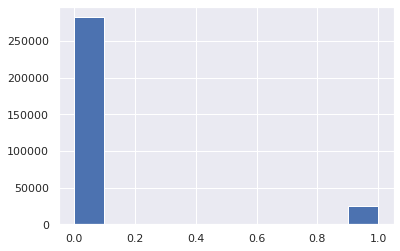

In [6]:
#як видно задача є незбалансованою, виведемо гістограму розподілу класів
X_train.loc[:, 'TARGET'].hist()

In [7]:
#функція для відображення статистики про missing values
def statistics_on_missing_val(X):
    mis_val = X.isnull().sum()
    mis_val = mis_val[mis_val != 0.0]
    mis_val_percent = (mis_val / X.shape[0] * 100).apply(lambda x: np.round(x,2))
    
    df = pd.concat([mis_val, mis_val_percent], axis=1)
    df.rename(columns={0:'Number of missing values', 1:'Fraction, %'}, inplace=True)
    print(f'Given data has {df.shape[0]} columns with missing values:')
    with pd.option_context('display.max_rows', None):
        display(df.sort_values(by='Fraction, %', ascending=False))
    

In [8]:
#для X_train
statistics_on_missing_val(X_train)

Given data has 67 columns with missing values:


Number of missing values  Fraction, %
COMMONAREA_MEDI                                 214865        69.87
COMMONAREA_AVG                                  214865        69.87
COMMONAREA_MODE                                 214865        69.87
NONLIVINGAPARTMENTS_MEDI                        213514        69.43
NONLIVINGAPARTMENTS_MODE                        213514        69.43
NONLIVINGAPARTMENTS_AVG                         213514        69.43
FONDKAPREMONT_MODE                              210295        68.39
LIVINGAPARTMENTS_MODE                           210199        68.35
LIVINGAPARTMENTS_MEDI                           210199        68.35
LIVINGAPARTMENTS_AVG                            210199        68.35
FLOORSMIN_MODE                                  208642        67.85
FLOORSMIN_MEDI                                  208642        67.85
FLOORSMIN_AVG                                   208642        67.85
YEARS_BUILD_MODE                                204488        66.50
YEARS_BUILD_MEDI                                204488        66.50
YEARS_BUILD_AVG                                 204488        66.50
OWN_CAR_AGE                                     202929        65.99
LANDAREA_AVG                                    182590        59.38
LANDAREA_MEDI                                   182590        59.38
LANDAREA_MODE                                   182590        59.38
BASEMENTAREA_MEDI                               179943        58.52
BASEMENTAREA_AVG                                179943        58.52
BASEMENTAREA_MODE                               179943        58.52
EXT_SOURCE_1                                    173378        56.38
NONLIVINGAREA_MEDI                              169682        55.18
NONLIVINGAREA_MODE                              169682        55.18
NONLIVINGAREA_AVG                               169682        55.18
ELEVATORS_MEDI                                  163891        53.30
ELEVATORS_MODE                                  163891        53.30
ELEVATORS_AVG                                   163891        53.30
WALLSMATERIAL_MODE                              156341        50.84
APARTMENTS_MODE                                 156061        50.75
APARTMENTS_MEDI                                 156061        50.75
APARTMENTS_AVG                                  156061        50.75
ENTRANCES_MODE                                  154828        50.35
ENTRANCES_AVG                                   154828        50.35
ENTRANCES_MEDI                                  154828        50.35
LIVINGAREA_MEDI                                 154350        50.19
LIVINGAREA_MODE                                 154350        50.19
LIVINGAREA_AVG                                  154350        50.19
HOUSETYPE_MODE                                  154297        50.18
FLOORSMAX_MEDI                                  153020        49.76
FLOORSMAX_AVG                                   153020        49.76
FLOORSMAX_MODE                                  153020        49.76
YEARS_BEGINEXPLUATATION_AVG                     150007        48.78
YEARS_BEGINEXPLUATATION_MEDI                    150007        48.78
YEARS_BEGINEXPLUATATION_MODE                    150007        48.78
TOTALAREA_MODE                                  148431        48.27
EMERGENCYSTATE_MODE                             145755        47.40
OCCUPATION_TYPE                                  96391        31.35
EXT_SOURCE_3                                     60965        19.83
AMT_REQ_CREDIT_BUREAU_WEEK                       41519        13.50
AMT_REQ_CREDIT_BUREAU_DAY                        41519        13.50
AMT_REQ_CREDIT_BUREAU_MON                        41519        13.50
AMT_REQ_CREDIT_BUREAU_QRT                        41519        13.50
AMT_REQ_CREDIT_BUREAU_HOUR                       41519        13.50
AMT_REQ_CREDIT_BUREAU_YEAR                       41519        13.50
NAME_TYPE_SUITE                                   1292         0.42
DEF_30_CNT_SOCIAL_

In [9]:
#для X_test
statistics_on_missing_val(X_test)

Given data has 64 columns with missing values:


Number of missing values  Fraction, %
COMMONAREA_MODE                                  33495        68.72
COMMONAREA_MEDI                                  33495        68.72
COMMONAREA_AVG                                   33495        68.72
NONLIVINGAPARTMENTS_MEDI                         33347        68.41
NONLIVINGAPARTMENTS_AVG                          33347        68.41
NONLIVINGAPARTMENTS_MODE                         33347        68.41
FONDKAPREMONT_MODE                               32797        67.28
LIVINGAPARTMENTS_MODE                            32780        67.25
LIVINGAPARTMENTS_MEDI                            32780        67.25
LIVINGAPARTMENTS_AVG                             32780        67.25
FLOORSMIN_MEDI                                   32466        66.61
FLOORSMIN_MODE                                   32466        66.61
FLOORSMIN_AVG                                    32466        66.61
OWN_CAR_AGE                                      32312        66.29
YEARS_BUILD_AVG                                  31818        65.28
YEARS_BUILD_MEDI                                 31818        65.28
YEARS_BUILD_MODE                                 31818        65.28
LANDAREA_MODE                                    28254        57.96
LANDAREA_AVG                                     28254        57.96
LANDAREA_MEDI                                    28254        57.96
BASEMENTAREA_MEDI                                27641        56.71
BASEMENTAREA_AVG                                 27641        56.71
BASEMENTAREA_MODE                                27641        56.71
NONLIVINGAREA_MEDI                               26084        53.51
NONLIVINGAREA_MODE                               26084        53.51
NONLIVINGAREA_AVG                                26084        53.51
ELEVATORS_MEDI                                   25189        51.68
ELEVATORS_MODE                                   25189        51.68
ELEVATORS_AVG                                    25189        51.68
WALLSMATERIAL_MODE                               23893        49.02
APARTMENTS_MODE                                  23887        49.01
APARTMENTS_MEDI                                  23887        49.01
APARTMENTS_AVG                                   23887        49.01
HOUSETYPE_MODE                                   23619        48.46
ENTRANCES_MODE                                   23579        48.37
ENTRANCES_MEDI                                   23579        48.37
ENTRANCES_AVG                                    23579        48.37
LIVINGAREA_AVG                                   23552        48.32
LIVINGAREA_MEDI                                  23552        48.32
LIVINGAREA_MODE                                  23552        48.32
FLOORSMAX_MEDI                                   23321        47.84
FLOORSMAX_MODE                                   23321        47.84
FLOORSMAX_AVG                                    23321        47.84
YEARS_BEGINEXPLUATATION_MEDI                     22856        46.89
YEARS_BEGINEXPLUATATION_MODE                     22856        46.89
YEARS_BEGINEXPLUATATION_AVG                      22856        46.89
TOTALAREA_MODE                                   22624        46.41
EMERGENCYSTATE_MODE                              22209        45.56
EXT_SOURCE_1                                     20532        42.12
OCCUPATION_TYPE                                  15605        32.01
EXT_SOURCE_3                                      8668        17.78
AMT_REQ_CREDIT_BUREAU_MON                         6049        12.41
AMT_REQ_CREDIT_BUREAU_HOUR                        6049        12.41
AMT_REQ_CREDIT_BUREAU_QRT                         6049        12.41
AMT_REQ_CREDIT_BUREAU_WEEK                        6049        12.41
AMT_REQ_CREDIT_BUREAU_DAY                         6049        12.41
AMT_REQ_CREDIT_BUREAU_YEAR                        6049        12.41
NAME_TYPE_SUITE                                    911         1.87
DEF_60_CNT_SOCIAL_

In [10]:
#позбудемось колонок які мають >= 65% missing values
cols_to_delete = ['FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'COMMONAREA_MEDI', 'YEARS_BUILD_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'COMMONAREA_MODE', 'YEARS_BUILD_MODE', 'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_AVG', 'COMMONAREA_AVG', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE']
X_train.drop(columns=cols_to_delete, inplace=True)
X_test.drop(columns=cols_to_delete, inplace=True)

In [11]:
#перевіримо на наявність дублікати в датасеті
if X_train.duplicated().sum() > 0 or X_test.duplicated().sum() > 0:
    print("There are duplicates!")
else:
    print("There are no duplicates!")

There are no duplicates!


In [12]:
#розглянемо типи даних наявні в тренувальному датасеті
X_train.dtypes.value_counts()

float64    49
int64      41
object     15
dtype: int64

In [13]:
#розглянемо категоріальні фічі
categorical_columns = X_train.loc[:, X_train.dtypes == 'object'].columns.to_numpy()
freq = []
for col in categorical_columns:
    freq.append(X_train[col].nunique())
with pd.option_context('display.max_rows', None):
    display(pd.concat([pd.Series(categorical_columns), pd.Series(freq)], axis=1).rename(columns={0:'Column', 1:'№ unique values'}))

Column  № unique values
0           NAME_CONTRACT_TYPE                2
1                  CODE_GENDER                3
2                 FLAG_OWN_CAR                2
3              FLAG_OWN_REALTY                2
4              NAME_TYPE_SUITE                7
5             NAME_INCOME_TYPE                8
6          NAME_EDUCATION_TYPE                5
7           NAME_FAMILY_STATUS                6
8            NAME_HOUSING_TYPE                6
9              OCCUPATION_TYPE               18
10  WEEKDAY_APPR_PROCESS_START                7
11           ORGANIZATION_TYPE               58
12              HOUSETYPE_MODE                3
13          WALLSMATERIAL_MODE                7
14         EMERGENCYSTATE_MODE                2

In [14]:
#як багато з них має відсутні значення
print("Number of missing values for categorical fetures:")
X_train[categorical_columns].isnull().sum()

Number of missing values for categorical fetures:


NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [15]:
#заповнимо усі категоріальні колонки значеннями які зустрічаються найчастіше
for col in categorical_columns:
    most_freq = X_train[col].mode()[0]
    X_train[col].fillna(most_freq, inplace=True)
    X_test[col].fillna(most_freq, inplace=True)

In [16]:
#Label Encoding для колонки 'WEEKDAY_APPR_PROCESS_START' оскільки дні тижня мають певний порядок
weekday_map = {'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3, 'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6, 'SUNDAY':7}
X_train['WEEKDAY_APPR_PROCESS_START'] = X_train['WEEKDAY_APPR_PROCESS_START'].map(weekday_map)
X_test['WEEKDAY_APPR_PROCESS_START'] = X_test['WEEKDAY_APPR_PROCESS_START'].map(weekday_map)

#застосуємо LabelEncoding до колонок де к-ть унікальних значень == 2, для всіх інших One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
counter = 0
class_le = LabelEncoder()
for col in categorical_columns:
    if X_train[col].nunique() == 2:
        X_train[col] = class_le.fit_transform(X_train[col])
        X_test[col] = class_le.transform(X_test[col])
        counter += 1
print(f'{counter} features were label encoded')

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

4 features were label encoded


In [17]:
#перевіримо к-ть фіч після енкодингу
print(f'Training set has {X_train.shape[1]} features')
print(f'Test set has {X_test.shape[1]} features')

Training set has 216 features
Test set has 212 features


In [18]:
#проведемо вирівнювання тренувального сету
y_train = X_train['TARGET']
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
print(f'After aligning training set has {X_train.shape[1]} features')
print(f'Test set has {X_test.shape[1]} features')

After aligning training set has 212 features
Test set has 212 features


In [19]:
#заповнимо усі колонки які залишились відповідними їм медіанами
mis_val = X_train.isnull().sum()
mis_val = mis_val[mis_val != 0]
for col in mis_val.index:
    median = X_train[col].median()
    X_train[col].fillna(median, inplace=True)
    X_test[col].fillna(median, inplace=True)

In [20]:
#виведемо базову статистику про тестовий та тренувальний сети
with pd.option_context('display.max_columns', None):
    print("Training set:")
    display(X_train.describe(include='all'))
    print("Test set:")
    display(X_test.describe(include='all'))

Training set:


SK_ID_CURR  NAME_CONTRACT_TYPE   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307511.000000       307511.000000  307511.000000    307511.000000   
mean   278180.518577            0.095213       0.340108         0.693673   
std    102790.175348            0.293509       0.473746         0.460968   
min    100002.000000            0.000000       0.000000         0.000000   
25%    189145.500000            0.000000       0.000000         0.000000   
50%    278202.000000            0.000000       0.000000         1.000000   
75%    367142.500000            0.000000       1.000000         1.000000   
max    456255.000000            1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.487841   
std         0.722121      2.371231e+05  4.024908e+05   14493.461065   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868  -16036.995067   
std       3.692890e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307511.000000      307511.000000    307511.000000  307511.000000   
mean    63815.045904       -4986.120328     -2994.202373       0.999997   
std    141275.766519        3522.886321      1509.450419       0.001803   
min    -17912.000000      -24672.000000     -7197.000000       0.000000   
25%     -2760.000000       -7479.500000     -4299.000000       1.000000   
50%     -1213.000000       -4504.000000     -3254.000000       1.000000   
75%      -289.000000       -2010.000000     -1720.000000       1.000000   
max    365243.000000           0.000000         0.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307511.000000         307511.000000   
mean        0.056720         2.152664              2.052463   
std         0.231307         0.910679              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
count                307511.000000               307511.000000   
mean       

Test set:


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count   48744.000000        48744.000000  48744.000000     48744.000000   
mean   277796.676350            0.009006      0.337129         0.690505   
std    103169.547296            0.094474      0.472734         0.462290   
min    100001.000000            0.000000      0.000000         0.000000   
25%    188557.750000            0.000000      0.000000         0.000000   
50%    277549.000000            0.000000      0.000000         1.000000   
75%    367555.500000            0.000000      1.000000         1.000000   
max    456250.000000            1.000000      1.000000         1.000000   

       CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  48744.000000      4.874400e+04  4.874400e+04   48744.000000   
mean       0.397054      1.784318e+05  5.167404e+05   29424.013109   
std        0.709047      1.015226e+05  3.653970e+05   16012.739181   
min        0.000000      2.694150e+04  4.500000e+04    2295.000000   
25%        0.000000      1.125000e+05  2.606400e+05   17973.000000   
50%        0.000000      1.575000e+05  4.500000e+05   26194.500000   
75%        1.000000      2.250000e+05  6.750000e+05   37390.500000   
max       20.000000      4.410000e+06  2.245500e+06  180576.000000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
count     4.874400e+04                48744.000000  48744.000000   
mean      4.626188e+05                    0.021226 -16068.084605   
std       3.367102e+05                    0.014428   4325.900393   
min       4.500000e+04                    0.000253 -25195.000000   
25%       2.250000e+05                    0.010006 -19637.000000   
50%       3.960000e+05                    0.018850 -15785.000000   
75%       6.300000e+05                    0.028663 -12496.000000   
max       2.245500e+06                    0.072508  -7338.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  \
count   48744.000000       48744.000000     48744.000000  48744.000000   
mean    67485.366322       -4967.652716     -3051.712949      0.999979   
std    144348.507136        3552.612035      1569.276709      0.004529   
min    -17463.000000      -23722.000000     -6348.000000      0.000000   
25%     -2910.000000       -7459.250000     -4448.000000      1.000000   
50%     -1293.000000       -4490.000000     -3234.000000      1.000000   
75%      -296.000000       -1901.000000     -1706.000000      1.000000   
max    365243.000000           0.000000         0.000000      1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count    48744.000000     48744.000000      48744.000000  48744.000000   
mean         0.809720         0.204702          0.998400      0.263130   
std          0.392526         0.403488          0.039971      0.440337   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      1.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  48744.000000     48744.000000          48744.000000   
mean       0.162646         2.146767              2.038159   
std        0.369046         0.890423              0.522694   
min        0.000000         1.000000              1.000000   
25%        0.000000         2.000000              2.000000   
50%        0.000000         2.000000              2.000000   
75%        0.000000         3.000000              2.000000   
max        1.000000        21.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
count                 48744.000000                48744.000000   
mean                      2.012596                    3.361070   

In [21]:
#з базової статистики видно, що фіча DAYS_EMPLOYED має дивно великий максимум 
X_train['DAYS_EMPLOYED'].max() / 365  # який складає більше тисячі років!

1000.6657534246575

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

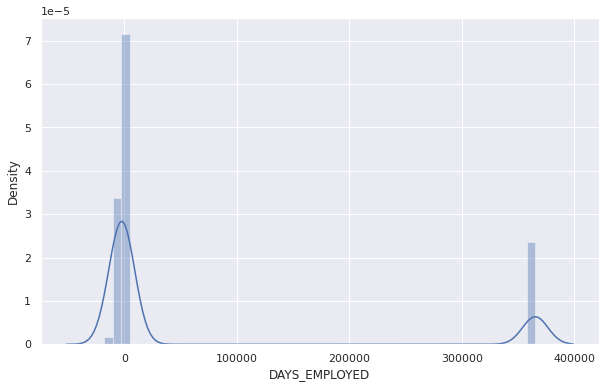

In [22]:
#подивимось на розподіл усієї колонки, щоб отримати уявлення про аномалії
plt.figure(figsize=(10,6))
sns.distplot(X_train['DAYS_EMPLOYED'])

In [23]:
anomaly_affect = y_train[X_train['DAYS_EMPLOYED'] == 365243.0].mean() * 100
nonanomaly_affect = y_train[X_train['DAYS_EMPLOYED'] != 365243.0].mean() * 100
print(f'Fraction of ppl with anomaly who had problems with loan {np.round(anomaly_affect,2)} %')
print(f'Fraction of ppl without an anomaly who had problems with loan {np.round(nonanomaly_affect,2)} %')

Fraction of ppl with anomaly who had problems with loan 5.4 %
Fraction of ppl without an anomaly who had problems with loan 8.66 %


In [24]:
#утворимо колонку яка вказуватиме на аномальні значення DAYS_EMPLOYED
X_train['ANOMALY_DAYS_EMPLOYED'] = (X_train['DAYS_EMPLOYED'] == 365243.0).apply(int)
X_test['ANOMALY_DAYS_EMPLOYED'] = (X_test['DAYS_EMPLOYED'] == 365243.0).apply(int)
#оскільки аномальні значення не роблять великого внеску в класифікацію цільової змінної замінимо їх медіаною колонки
median = X_train['DAYS_EMPLOYED'].median()
X_train[X_train['DAYS_EMPLOYED'] == 365243.0]['DAYS_EMPLOYED'] = median
X_test[X_test['DAYS_EMPLOYED'] == 365243.0]['DAYS_EMPLOYED'] = median

In [25]:
#колонка FLAG_MOBIL здається доволі дивною згідно з базовою статистикою, переглянемо її значення
X_train['FLAG_MOBIL'].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [26]:
#видалимо фічу FLAG_MOBIL оскільки лише одна людина не надала свій номер телефону
X_train.drop(columns='FLAG_MOBIL', inplace=True)
X_test.drop(columns='FLAG_MOBIL', inplace=True)

In [27]:
#та ж справа і з 'FLAG_CONT_MOBILE'
X_train.drop(columns='FLAG_CONT_MOBILE', inplace=True)
X_test.drop(columns='FLAG_CONT_MOBILE', inplace=True)

In [28]:
#щоб будувати графіки для аналізу датасету поглянемо на кореляції між фічами
X_train['TARGET'] = y_train
corr_matrix = X_train.corr().sort_values(by=['TARGET'])
print('Most correlated features:')
with pd.option_context('display.max_columns', None):
    display(corr_matrix.head(20))
    display(corr_matrix.tail(20))

Most correlated features:


SK_ID_CURR  NAME_CONTRACT_TYPE  \
EXT_SOURCE_2                            0.002319            0.015941   
EXT_SOURCE_3                            0.000184           -0.004323   
EXT_SOURCE_1                            0.000060           -0.009776   
NAME_EDUCATION_TYPE_Higher education   -0.000495            0.062323   
CODE_GENDER_F                           0.000749            0.008699   
NAME_INCOME_TYPE_Pensioner              0.001399           -0.054852   
ANOMALY_DAYS_EMPLOYED                   0.001368           -0.054967   
ORGANIZATION_TYPE_XNA                   0.001368           -0.054967   
DAYS_EMPLOYED                           0.001366           -0.054450   
AMT_GOODS_PRICE                        -0.000258           -0.185711   
FLOORSMAX_AVG                           0.003550            0.025648   
FLOORSMAX_MEDI                          0.003371            0.025367   
FLOORSMAX_MODE                          0.003233            0.024149   
REGION_POPULATION_RELATIVE              0.000849            0.026867   
ELEVATORS_AVG                           0.003612            0.021496   
ELEVATORS_MEDI                          0.003742            0.021189   
ELEVATORS_MODE                          0.003711            0.020529   
NAME_CONTRACT_TYPE                      0.001654            1.000000   
AMT_CREDIT                             -0.000343           -0.221648   
TOTALAREA_MODE                          0.001861            0.018236   

                                      FLAG_OWN_CAR  FLAG_OWN_REALTY  \
EXT_SOURCE_2                              0.053685         0.002587   
EXT_SOURCE_3                             -0.016272         0.036962   
EXT_SOURCE_1                             -0.039876         0.054510   
NAME_EDUCATION_TYPE_Higher education      0.092936        -0.015360   
CODE_GENDER_F                            -0.345847         0.044361   
NAME_INCOME_TYPE_Pensioner               -0.154826         0.070155   
ANOMALY_DAYS_EMPLOYED                    -0.154778         0.070107   
ORGANIZATION_TYPE_XNA                    -0.154778         0.070107   
DAYS_EMPLOYED                            -0.154441         0.069677   
AMT_GOODS_PRICE                           0.120435        -0.045571   
FLOORSMAX_AVG                             0.022485         0.009426   
FLOORSMAX_MEDI                            0.022581         0.009492   
FLOORSMAX_MODE                            0.022620         0.010213   
REGION_POPULATION_RELATIVE                0.041314         0.015175   
ELEVATORS_AVG                             0.012402         0.009492   
ELEVATORS_MEDI                            0.012318         0.009513   
ELEVATORS_MODE                            0.011699         0.009954   
NAME_CONTRACT_TYPE                        0.004022         0.067177   
AMT_CREDIT                                0.116225        -0.039270   
TOTALAREA_MODE                            0.019654         0.012922   

                                      CNT_CHILDREN  AMT_INCOME_TOTAL  \
EXT_SOURCE_2                             -0.017990          0.060855   
EXT_SOURCE_3                             -0.039543         -0.030737   
EXT_SOURCE_1                             -0.098389          0.024389   
NAME_EDUCATION_TYPE_Higher education      0.033654          0.095342   
CODE_GENDER_F                            -0.047394         -0.074731   
NAME_INCOME_TYPE_Pensioner               -0.240719         -0.064018   
ANOMALY_DAYS_EMPLOYED                    -0.240722         -0.064038   
ORGANIZATION_TYPE_XNA                    -0.240722         -0.064038   
DAYS_EMPLOYED                            -0.239818         -0.064223   
AMT_GOODS_PRICE                          -0.001856          0.159632   
FLOORSMAX_AVG                            -0.016865          0.068419   
FLOORSMAX_MEDI                           -0.016611          0.067895   
FLOORSMAX_MODE                           -0.016196          0.065618   
REGION_POPULATION_RELATIV

SK_ID_CURR  \
ORGANIZATION_TYPE_Self-employed                      0.002820   
NAME_HOUSING_TYPE_With parents                       0.000976   
OCCUPATION_TYPE_Drivers                              0.000467   
DEF_60_CNT_SOCIAL_CIRCLE                             0.001182   
DEF_30_CNT_SOCIAL_CIRCLE                            -0.000085   
LIVE_CITY_NOT_WORK_CITY                              0.000067   
DAYS_REGISTRATION                                   -0.000973   
FLAG_DOCUMENT_3                                     -0.003411   
REG_CITY_NOT_LIVE_CITY                              -0.001885   
FLAG_EMP_PHONE                                      -0.001337   
NAME_EDUCATION_TYPE_Secondary / secondary special   -0.001154   
REG_CITY_NOT_WORK_CITY                              -0.001582   
DAYS_ID_PUBLISH                                     -0.000384   
CODE_GENDER_M                                       -0.000728   
DAYS_LAST_PHONE_CHANGE                              -0.000859   
NAME_INCOME_TYPE_Working                            -0.002610   
REGION_RATING_CLIENT                                -0.001075   
REGION_RATING_CLIENT_W_CITY                         -0.001138   
DAYS_BIRTH                                          -0.001500   
TARGET                                              -0.002108   

                                                   NAME_CONTRACT_TYPE  \
ORGANIZATION_TYPE_Self-employed                              0.007932   
NAME_HOUSING_TYPE_With parents                               0.023059   
OCCUPATION_TYPE_Drivers                                     -0.019344   
DEF_60_CNT_SOCIAL_CIRCLE                                    -0.009268   
DEF_30_CNT_SOCIAL_CIRCLE                                    -0.011756   
LIVE_CITY_NOT_WORK_CITY                                     -0.004999   
DAYS_REGISTRATION                                            0.020557   
FLAG_DOCUMENT_3                                             -0.479724   
REG_CITY_NOT_LIVE_CITY                                       0.013586   
FLAG_EMP_PHONE                                               0.054938   
NAME_EDUCATION_TYPE_Secondary / secondary special           -0.061729   
REG_CITY_NOT_WORK_CITY                                       0.004487   
DAYS_ID_PUBLISH                                              0.052847   
CODE_GENDER_M                                               -0.008783   
DAYS_LAST_PHONE_CHANGE                                       0.061830   
NAME_INCOME_TYPE_Working                                     0.020789   
REGION_RATING_CLIENT                                        -0.021593   
REGION_RATING_CLIENT_W_CITY                                 -0.023116   
DAYS_BIRTH                                                   0.086364   
TARGET                                                      -0.030896   

                                                   FLAG_OWN_CAR  \
ORGANIZATION_TYPE_Self-employed                        0.029726   
NAME_HOUSING_TYPE_With parents                         0.006303   
OCCUPATION_TYPE_Drivers                                0.186404   
DEF_60_CNT_SOCIAL_CIRCLE                              -0.015505   
DEF_30_CNT_SOCIAL_CIRCLE                              -0.015161   
LIVE_CITY_NOT_WORK_CITY                                0.088061   
DAYS_REGISTRATION                                      0.087766   
FLAG_DOCUMENT_3                                       -0.070000   
REG_CITY_NOT_LIVE_CITY                                 0.003123   
FLAG_EMP_PHONE                                         0.154659   
NAME_EDUCATION_TYPE_Secondary / secondary special     -0.087795   
REG_CITY_NOT_WORK_CITY                                 0.076081   
DAYS_ID_PUBLISH                                        0.013661   
CODE_GENDER_M                                          0.345841   
DAYS_LAST_PHONE_CHANGE                                -0.039089   
NAME_INCOME_TYPE_Working                               0.067329   
REGION_RATIN

Text(0.5, 1.0, 'EXT_SOURCE_3')

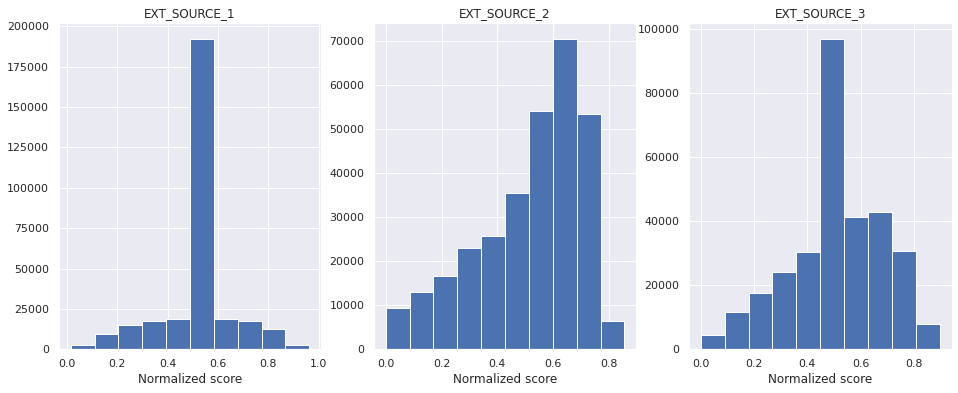

In [29]:
#розглянемо фічі 'EXT_SOURCE' які дають найбільші від'ємні кореляції із цільовою змінною
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
ax[0].hist(X_train['EXT_SOURCE_1'])
ax[0].set_xlabel('Normalized score')
ax[0].set_title('EXT_SOURCE_1')
ax[1].hist(X_train['EXT_SOURCE_2'])
ax[1].set_xlabel('Normalized score')
ax[1].set_title('EXT_SOURCE_2')
ax[2].hist(X_train['EXT_SOURCE_3'])
ax[2].set_xlabel('Normalized score')
ax[2].set_title('EXT_SOURCE_3')

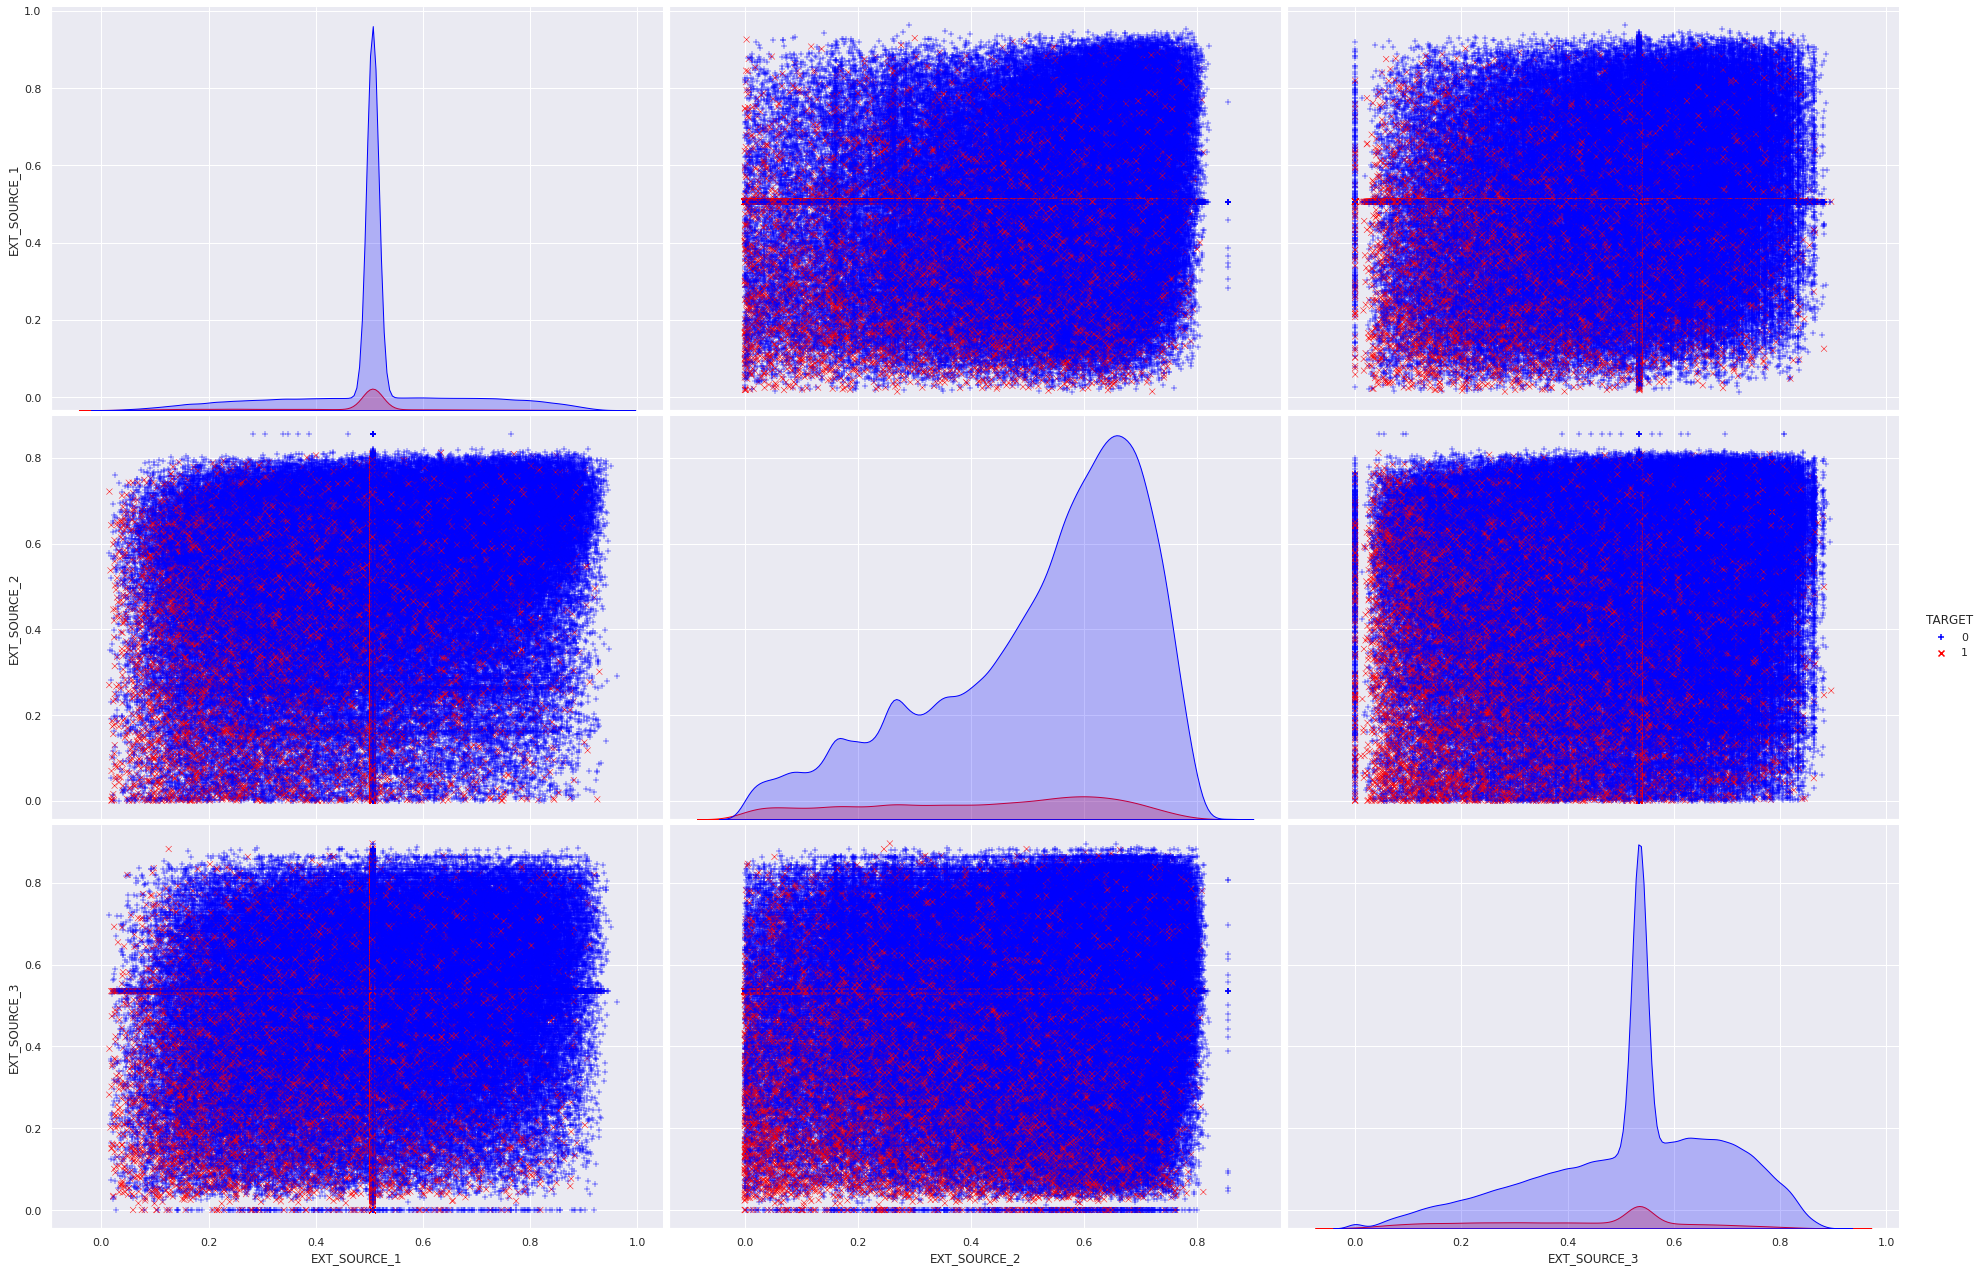

In [30]:
#поглянемо на сумісні розподіли фіч 'EXT_SOURCE' з точки зору цільової змінної
analysis = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
sns.pairplot(data=X_train, vars=analysis, hue='TARGET', diag_kind='kde', markers=['+','x'], height=6, aspect=1.5, palette={0:'blue', 1:'red'})

Text(0.5, 1.0, 'Distribution of YEARS_BIRTH')

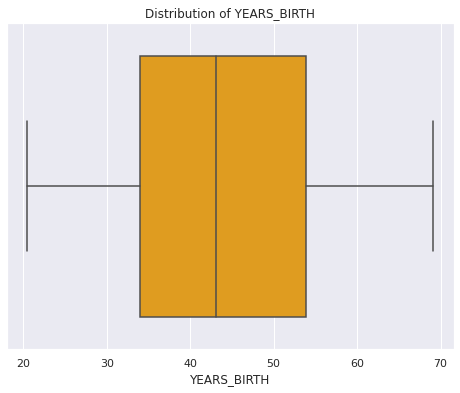

In [31]:
#найбільш позитивно корельованою фічею з цільовою змінною є 'DAYS_BIRTH'
plt.figure(figsize=(8,6))
sns.boxplot(X_train['DAYS_BIRTH']/-365, color='orange') #розглянемо цю фічу в роках
plt.xlabel('YEARS_BIRTH')
plt.title('Distribution of YEARS_BIRTH')

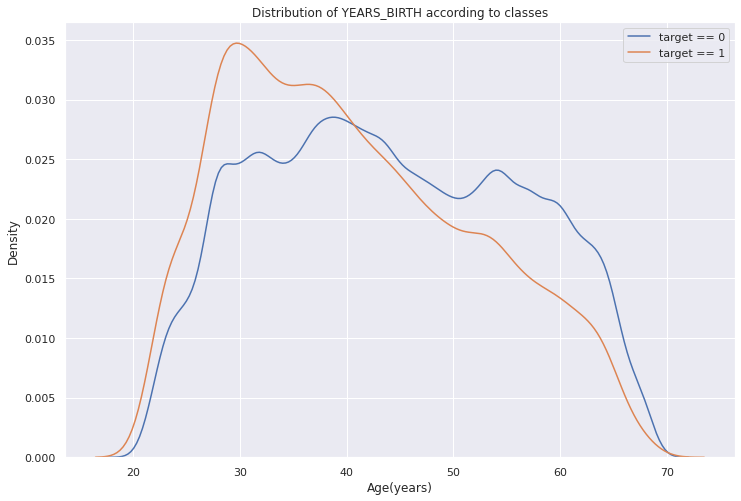

In [32]:
#подивимось на розподіл класів цільової змінної для щільності розподілу 'DAYS_BIRTH'/-365 == 'YEARS_BIRTH'
plt.figure(figsize=(12,8))
sns.kdeplot((X_train[X_train['TARGET'] == 0]['DAYS_BIRTH']/-365), label='target == 0')
sns.kdeplot((X_train[X_train['TARGET'] == 1]['DAYS_BIRTH']/-365), label='target == 1')
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of YEARS_BIRTH according to classes')
plt.legend()

<AxesSubplot:>

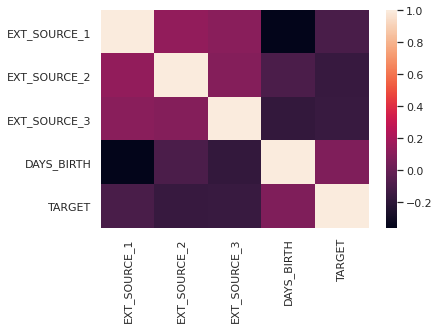

In [33]:
#побудуємо хітмапу матриці кореляції розглянутих фіч
analysis.append('DAYS_BIRTH')
analysis.append('TARGET')
corr_matr = X_train[analysis].corr()
sns.heatmap(corr_matr)

In [34]:
X_train.drop(columns='TARGET', inplace=True)

In [35]:
#проведемо feature scaling за допомогою MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)   #використовуємо ті ж параметри що і для X_train щоб датасети можна було співставити

In [36]:
#поділимо тренувальні дані на дві частини: для тренування і валідації у відношенні 90% та 10% відповідно
from sklearn.model_selection import train_test_split
X_train_sc, X_val_sc, y_train, y_val = train_test_split(X_train_sc, y_train, test_size=0.1)

In [37]:
#розглянемо розмірності отриманих наборів
print(f'Dimensions of training set are {X_train_sc.shape}')
print(f'Dimensions of validation set are {X_val_sc.shape}')

Dimensions of training set are (276759, 211)
Dimensions of validation set are (30752, 211)


In [38]:
from sklearn.metrics import roc_auc_score   #метрика для оцінювання
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
hyperparam_c = [0.0001 * 10**i for i in range(8)] #параметр обернений до регуляризаційного, походить із SVM
scores = []
for i in tqdm(range(len(hyperparam_c))):
    lrc = LogisticRegression(C=hyperparam_c[i])
    lrc.fit(X_train_sc, y_train)
    prediction_percent = lrc.predict_proba(X_val_sc)[:,1]
    scores.append(roc_auc_score(y_val, prediction_percent))

100%|██████████| 8/8 [00:44<00:00,  5.58s/it]


In [39]:
#виведемо параметри і відповідні отримані вартості
for i in range(len(scores)):
    print(f'Model gained score {np.round(scores[i],4)} with parameter {hyperparam_c[i]}')

Model gained score 0.6868 with parameter 0.0001
Model gained score 0.7297 with parameter 0.001
Model gained score 0.7402 with parameter 0.01
Model gained score 0.7431 with parameter 0.1
Model gained score 0.7441 with parameter 1.0
Model gained score 0.7438 with parameter 10.0
Model gained score 0.744 with parameter 100.0
Model gained score 0.7437 with parameter 1000.0


In [40]:
#оберемо С=10.0 і тепер натренуємо модель на усіх тренувальних даних
X_train_sc = np.vstack((X_train_sc, X_val_sc))
y_train = np.hstack((y_train, y_val))
lrc = LogisticRegression(C=10.0)
lrc.fit(X_train_sc, y_train)

submission_file = X_test[['SK_ID_CURR']]
submission_file['TARGET'] = lrc.predict_proba(X_test_sc)[:,1]
submission_file.head()

SK_ID_CURR    TARGET
0      100001  0.051165
1      100005  0.238236
2      100013  0.062985
3      100028  0.037267
4      100038  0.131050

In [41]:
#запишемо результат в .csv файл
submission_file.to_csv('/home/linups/submission.csv', index=False)